In [1]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = False

import warnings
warnings.filterwarnings("ignore")

from prop_models import coro, agpm, misc
reload(coro)

wavelength_c = 750e-9*u.m

reload(agpm)
vortex = agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6)
lyot_stop = poppy.CircularAperture(name='Lyot Stop', radius=3.65*u.mm/2, gray_pixel=False)


DEBUG:poppy:Skipping oversampling, oversample < 1 or already padded 


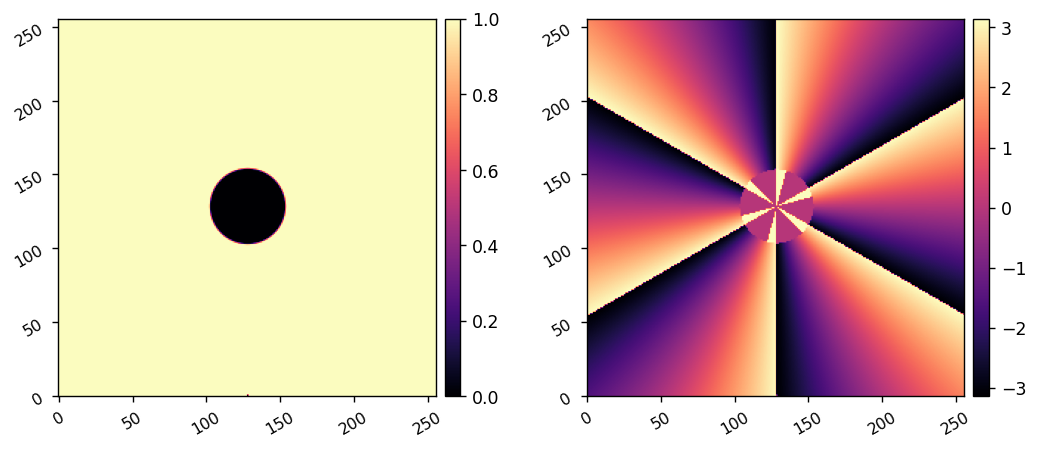

In [2]:
reload(agpm)
vortex = agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6, singularity=20*u.um)
wave = poppy.FresnelWavefront(wavelength=wavelength_c, beam_radius=50*u.um, npix=256, oversample=1)
vvc_phasor = vortex.get_phasor(wave)
misc.myimshow2(np.abs(vvc_phasor), np.angle(vvc_phasor))

In [3]:
c = coro.CORO(dm_inf='inf.fits')

INFO:poppy:Loaded influence function from inf.fits for DM
DEBUG:poppy:Initialized: OAP1, fl =2.00e-01 m
DEBUG:poppy:Initialized: OAP2, fl =2.00e-01 m
DEBUG:poppy:Initialized: OAP3, fl =5.00e-01 m
DEBUG:poppy:Initialized: OAP4, fl =3.50e-01 m
DEBUG:poppy:Initialized: OAP5, fl =2.00e-01 m
INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added optic: Circle, radius=5.1 mm after separation: 0.00e+00 m 
INFO:poppy:Added optic: DM after separation: 0.00e+00 m 
INFO:poppy:Added optic: OAP1 after separation: 2.00e+02 mm 
INFO:poppy:Added optic: Circle, radius=6.35 mm after separation: 0.00e+00 m 
INFO:poppy:Added optic: Int Focal Plane after separation: 2.00e+02 mm 
INFO:poppy:Added optic: OAP2 after separation: 2.00e+02 mm 
INFO:poppy:Added optic: Circle, radius=6.35 mm after separation: 0.00e+00 m 
INFO:poppy:Added optic: Apodizer Place-holder after separation: 2.00e+02 mm 
INFO:poppy:Added optic: OAP3 after separation: 5.00e+02 mm 
INFO:poppy:Added optic: Circle, radius=6.35 

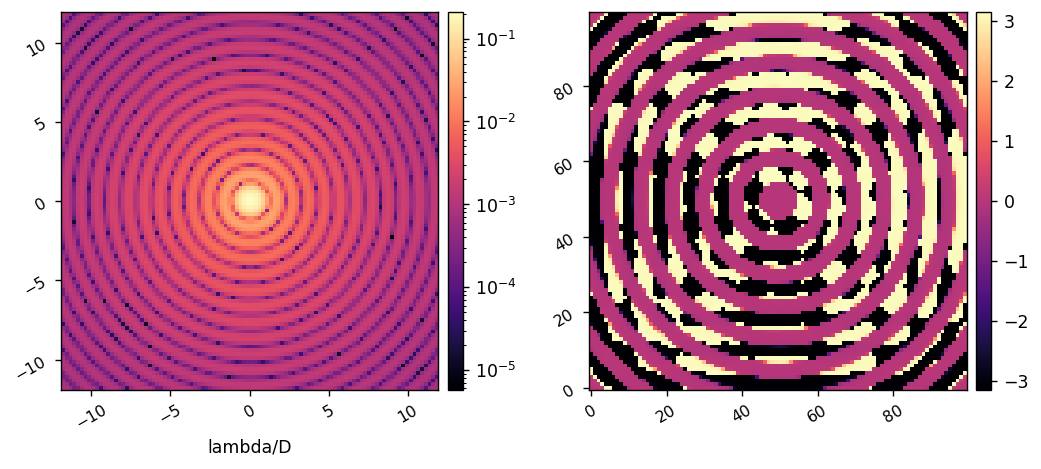

In [21]:
reload(coro)
reload(misc)
poppy_log.disabled = True

vortex = agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6, singularity=20*u.um)
lyot_stop = poppy.CircularAperture(name='Lyot Stop', radius=3*u.mm, gray_pixel=False)

c = coro.CORO(npix=128, oversample=16, npsf=100,
              psf_pixelscale=5e-6*u.m/u.pix,
              detector_rotation=0,
#               use_opds=True,
#               FPM=vortex,
#               LYOT=lyot_stop,
             )

psf = c.calc_psf()
misc.myimshow2(np.abs(psf), np.angle(psf),
               pxscl1=c.psf_pixelscale_lamD, lognorm1=True)



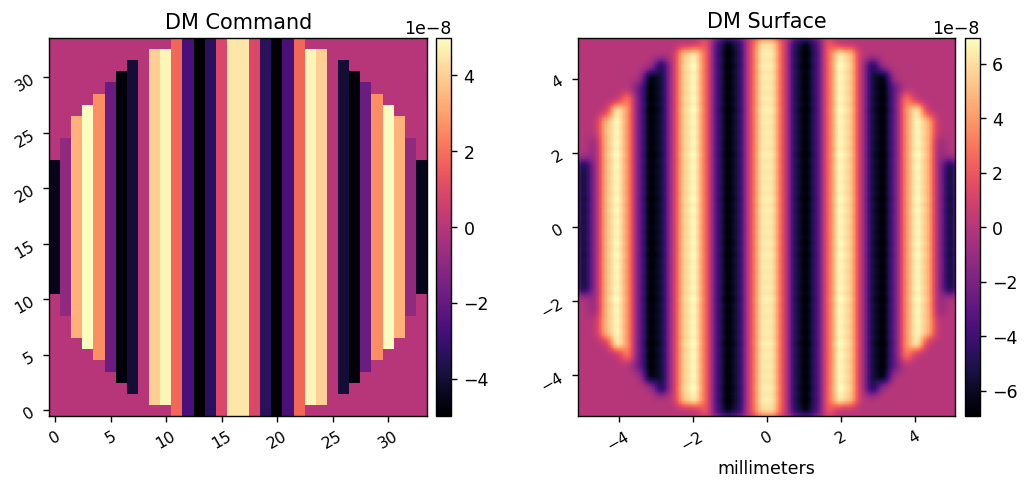

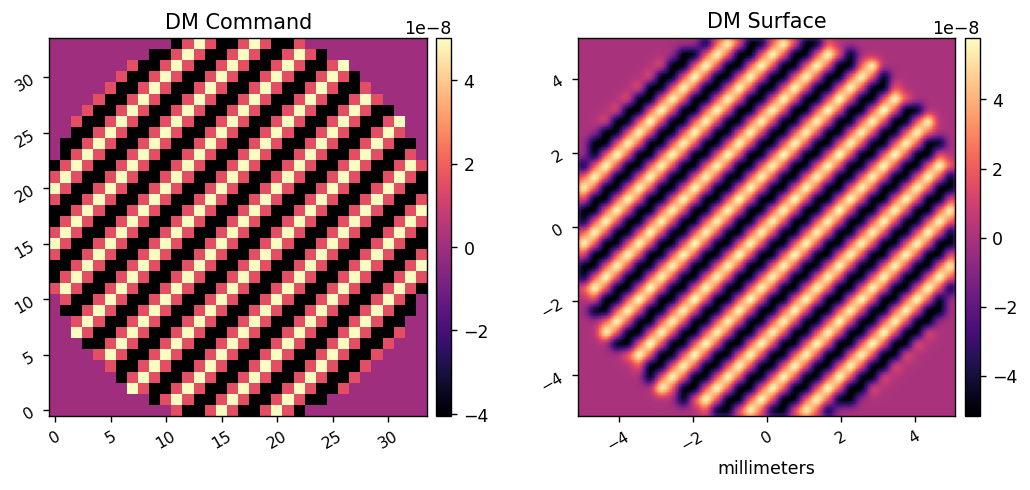

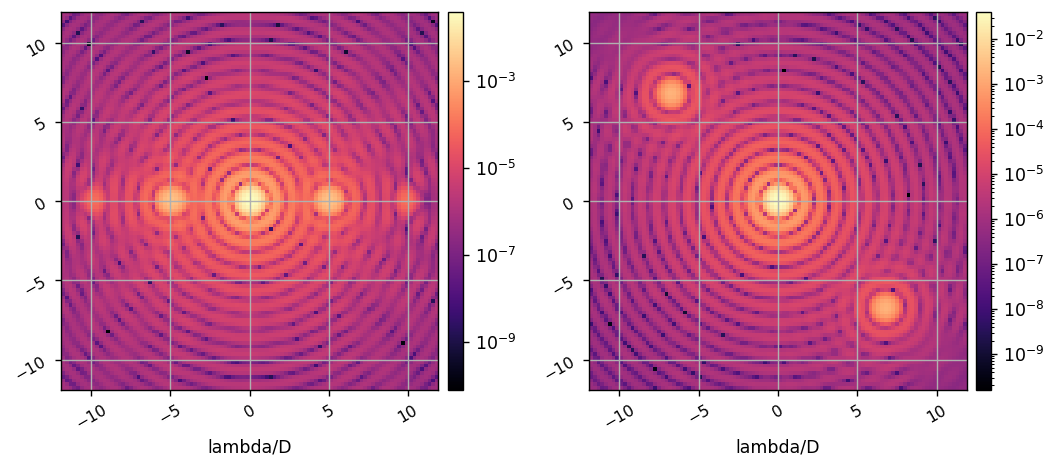

In [22]:
Nact = c.Nact

xpp = np.linspace(-c.Nact/2, c.Nact/2-1, c.Nact) + 1/2
ppx, ppy = np.meshgrid(xpp,xpp)

separation = 5

amp = 5e-8
com_1 = amp*np.cos(2*np.pi*ppx*separation/Nact)*c.dm_mask
com_2 = amp*np.cos(2*np.pi*(ppx - ppy)/separation)*c.dm_mask

c.set_dm(com_1)
c.show_dm()
im1 = c.snap()

c.set_dm(com_2)
c.show_dm()
im2 = c.snap()

misc.myimshow2(im1, im2, 
               pxscl1=c.psf_pixelscale_lamD, lognorm1=True,
               pxscl2=c.psf_pixelscale_lamD, lognorm2=True,
              grid=True)

In [27]:
32*128

4096

In [11]:
reload(coro)
poppy_log.disabled = False

vortex = agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6, singularity=20*u.um)
lyot_stop = poppy.CircularAperture(name='Lyot Stop', radius=3*u.mm, gray_pixel=False)

c = coro.CORO(dm_inf='inf.fits',
              npix=128,
              oversample=16,
#               use_opds=True,
              FPM=vortex,
              LYOT=lyot_stop,
             )
wfs = c.calc_wfs()


INFO:poppy:Loaded influence function from inf.fits for DM
DEBUG:poppy:Initialized: OAP1, fl =2.00e-01 m
DEBUG:poppy:Initialized: OAP2, fl =2.00e-01 m
DEBUG:poppy:Initialized: OAP3, fl =5.00e-01 m
DEBUG:poppy:Initialized: OAP4, fl =3.50e-01 m
DEBUG:poppy:Initialized: OAP5, fl =2.00e-01 m
INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added optic: Circle, radius=5.1 mm after separation: 0.00e+00 m 
INFO:poppy:Added optic: DM after separation: 0.00e+00 m 
INFO:poppy:Added optic: OAP1 after separation: 2.00e+02 mm 
INFO:poppy:Added optic: Circle, radius=6.35 mm after separation: 0.00e+00 m 
INFO:poppy:Added optic: Int Focal Plane after separation: 2.00e+02 mm 
INFO:poppy:Added optic: OAP2 after separation: 2.00e+02 mm 
INFO:poppy:Added optic: Circle, radius=6.35 mm after separation: 0.00e+00 m 
INFO:poppy:Added optic: Apodizer Place-holder after separation: 2.00e+02 mm 
INFO:poppy:Added optic: OAP3 after separation: 5.00e+02 mm 
INFO:poppy:Added optic: Circle, radius=6.35 

DEBUG:poppy: input curved wavefront and OAP2 has output beam curvature of =-2.97e+04 m
DEBUG:poppy:OAP2 has a curvature of =-2.97e+04 m
DEBUG:poppy:OAP2 has a curved output wavefront, with waist at 1.0000000000219247 m
DEBUG:poppy:Post Optic Parameters:w_0:5.100e-03 m, z_w0=1.000e+00 m
z=6.000e-01 m, z_r=1.090e+02 m
DEBUG:poppy:Magnification: -148379.9612431912  from R_in = 0.20000067394999377 m, R_out = -29676.092249312198 m
DEBUG:poppy:Output beam focal length is now -29675.992248638242 m
DEBUG:poppy:Spherical to Planar.
DEBUG:poppy:Applying spherical phase curvature =-5.94e+04 m
DEBUG:poppy:Applying spherical lens phase =-1.68e-05 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP2
DEBUG:poppy:------ Optic: OAP2 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: Circle, radius=6.35 mm after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Optic: Circle, radius=6.35 mm
DEBUG:poppy:  Propagating wavefront to Optic: Apodizer Place-holder after distance 0.2 m 

DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 2.70e+00 m ------
DEBUG:poppy:------ Applying Lens: OAP5 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:3.570e-03 m, z_w0=2.745e+00 m
z=2.700e+00 m, z_r=5.339e+01 m
DEBUG:poppy:  Beam radius at OAP5 =3.57e-03 m
DEBUG:poppy: input flat wavefront and OAP5 has output beam curvature of =-2.00e-01 m
DEBUG:poppy:OAP5 has a curvature of =-2.00e-01 m
DEBUG:poppy:OAP5 has a curved output wavefront, with waist at 2.8999971931210786 m
DEBUG:poppy:Post Optic Parameters:w_0:1.337e-05 m, z_w0=2.900e+00 m
z=2.700e+00 m, z_r=7.492e-04 m
DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_out = -0.2 m
DEBUG:poppy:Output beam focal length is now 0.0 m
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:Applying spherical phase curvature =1.43e+04 m
DEBUG:poppy:Applying spherical lens phase =7.02e-05 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP5
DEBUG:poppy:------ Optic: OAP5 applie

In [17]:
c.pupil_diam

<Quantity 10.2 mm>

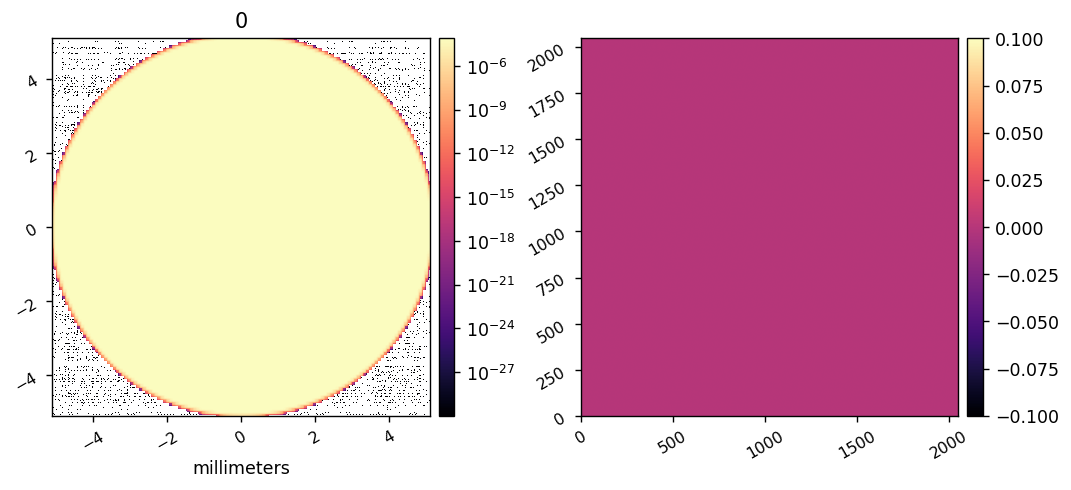

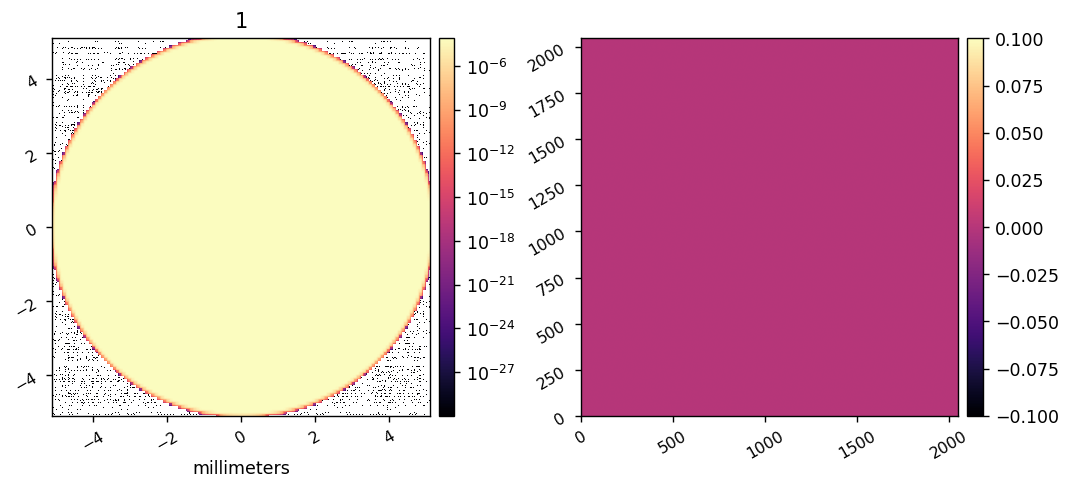

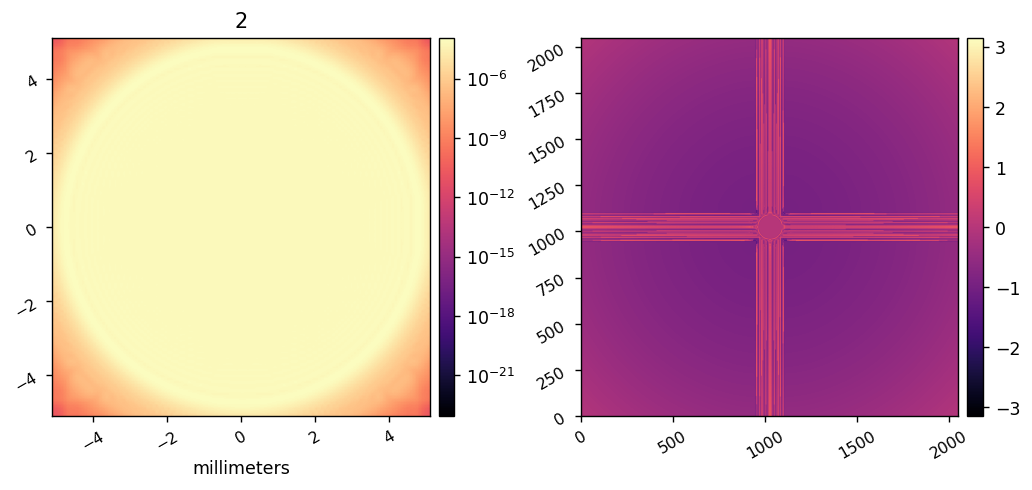

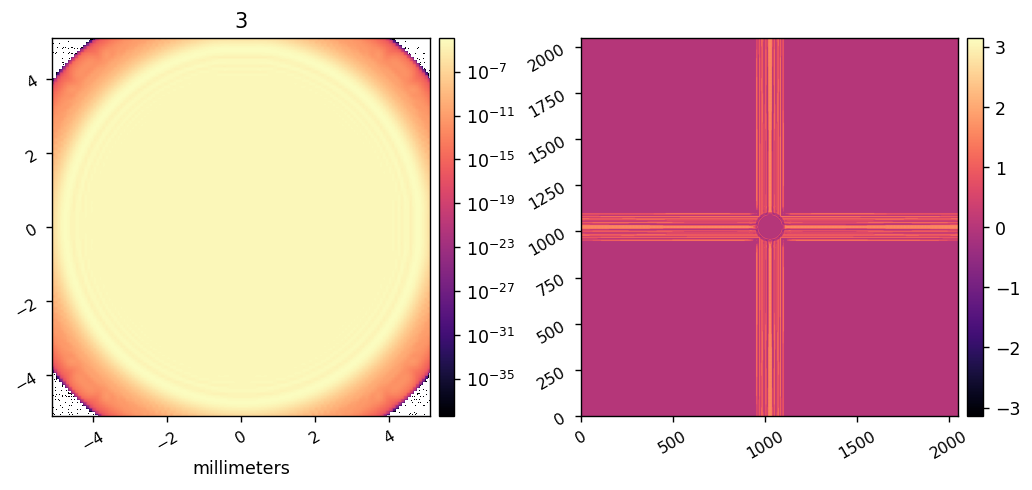

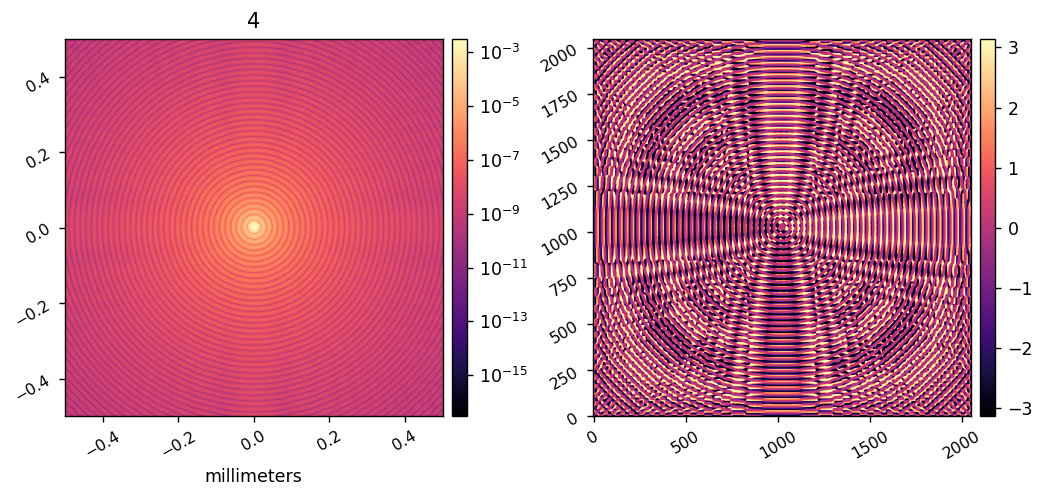

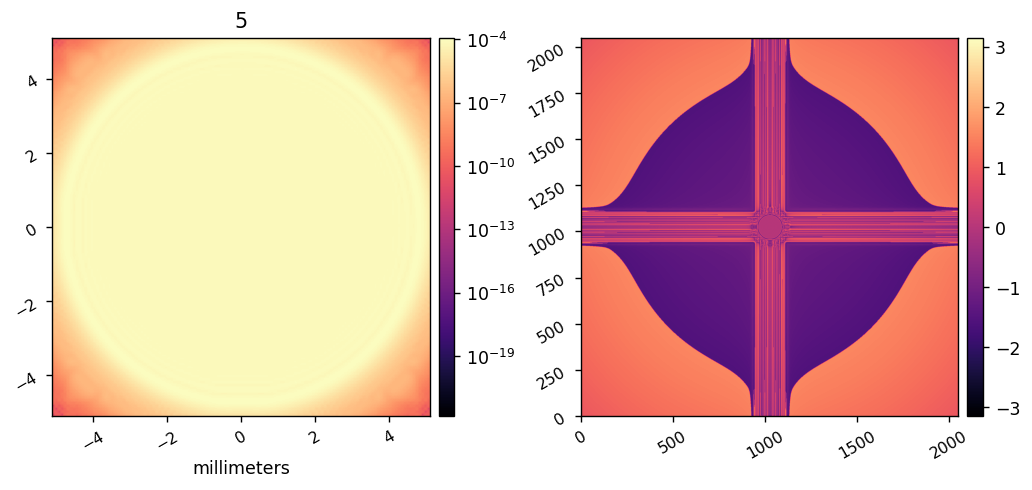

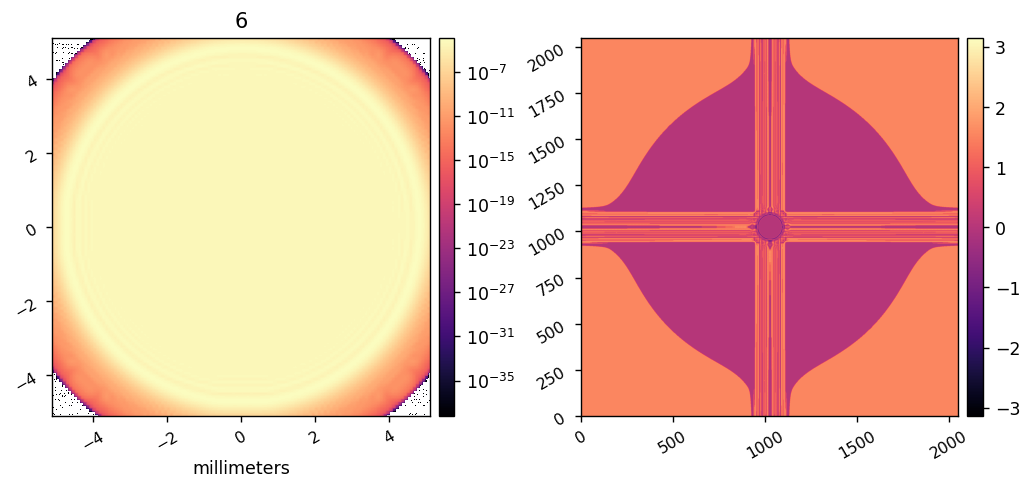

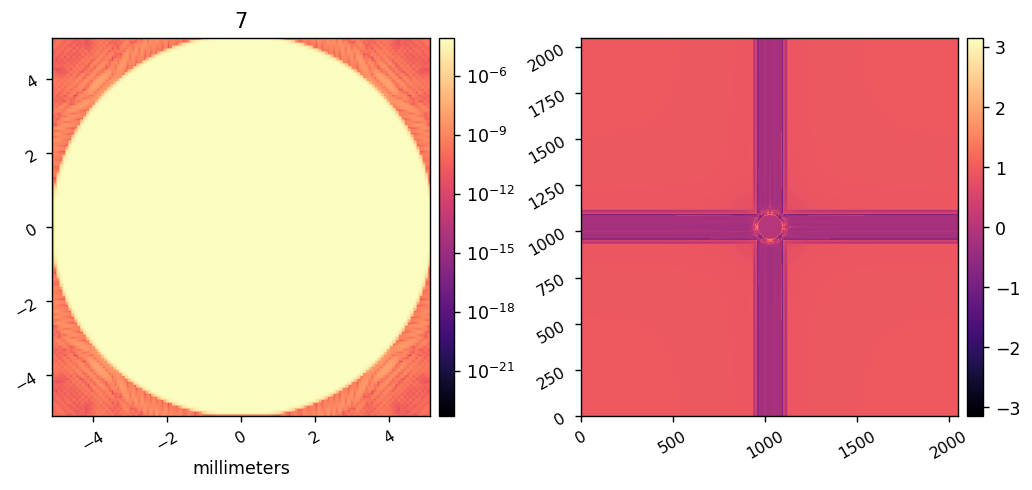

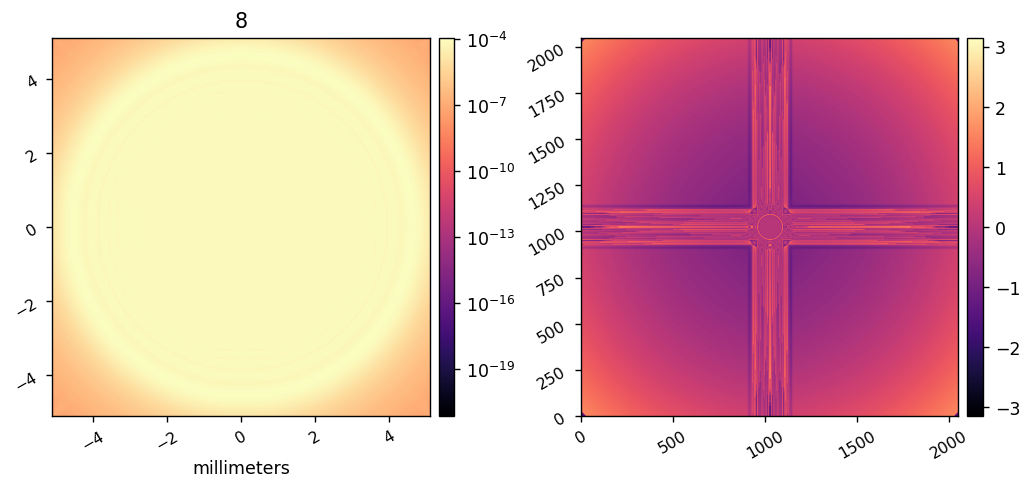

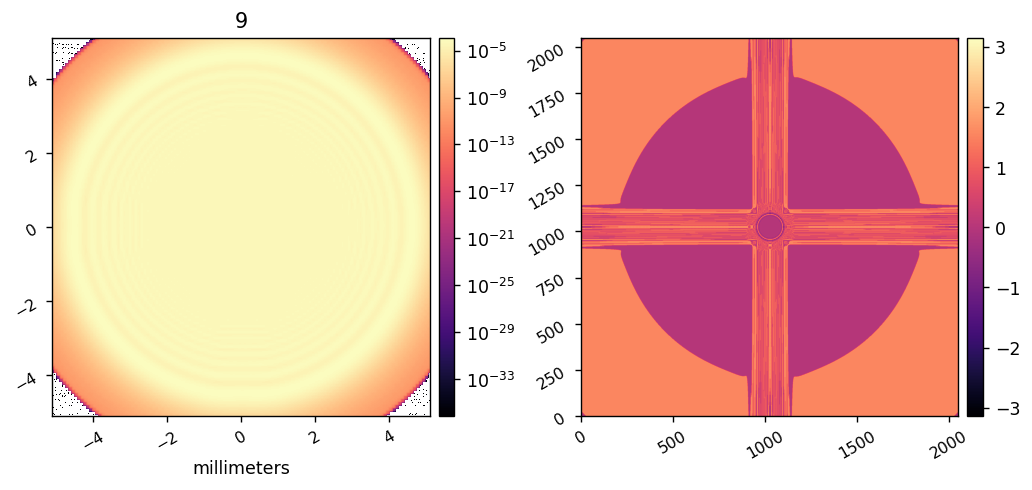

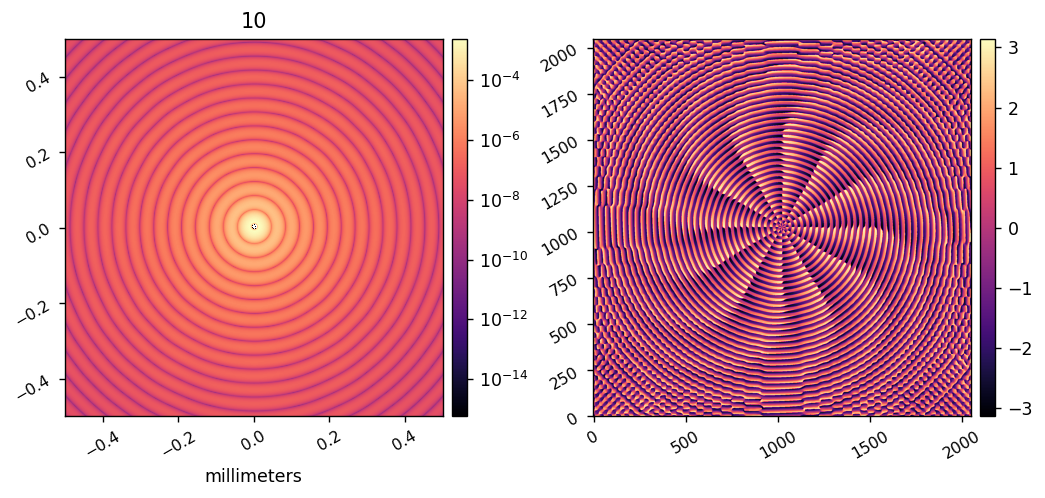

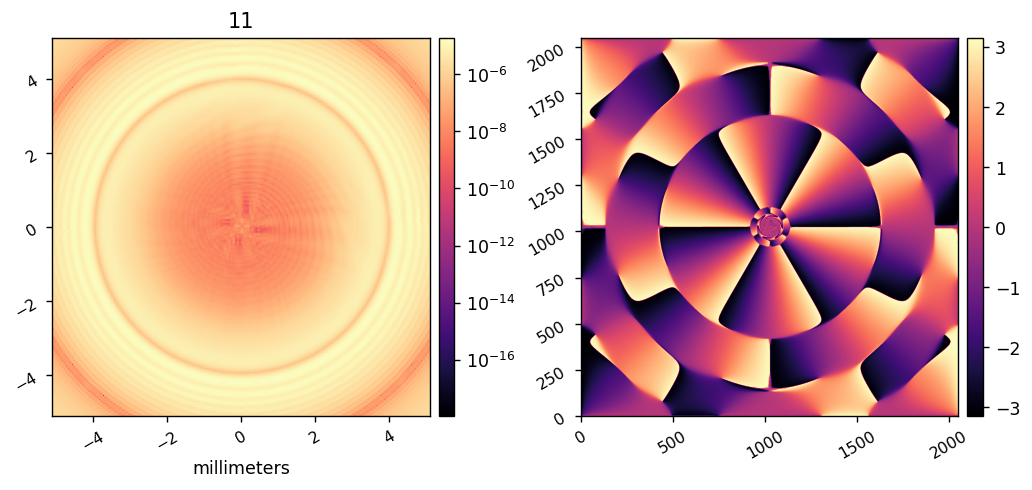

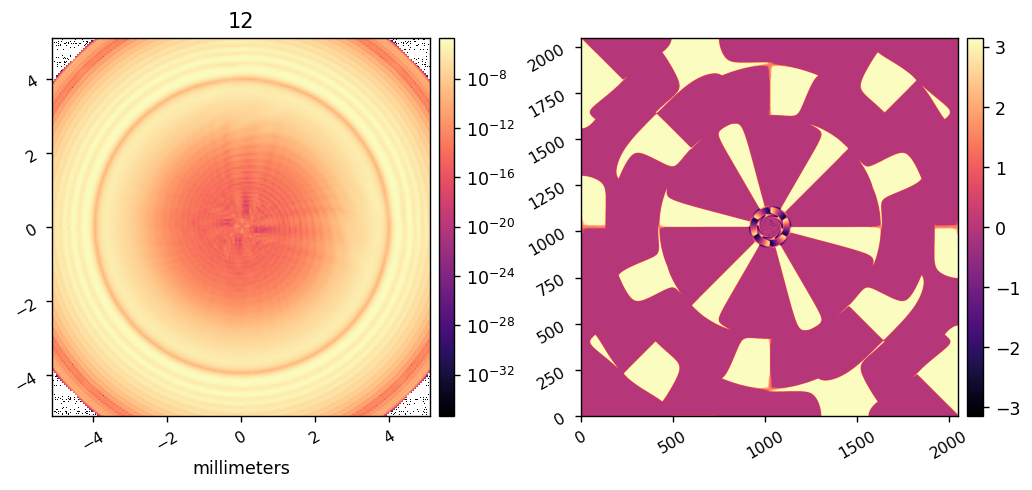

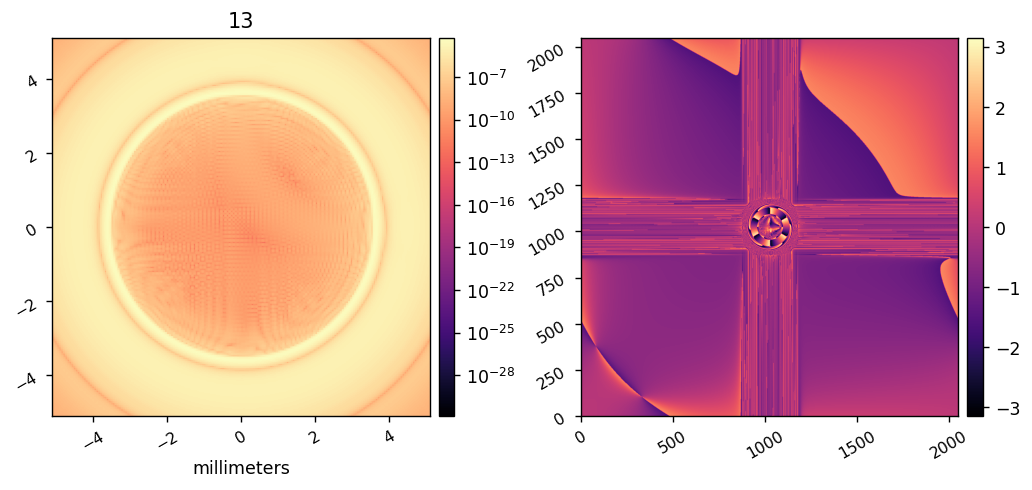

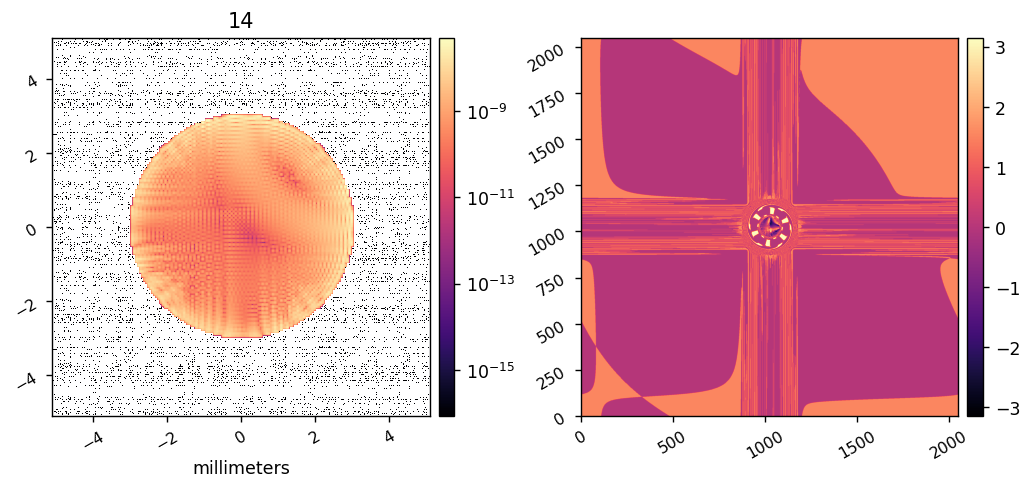

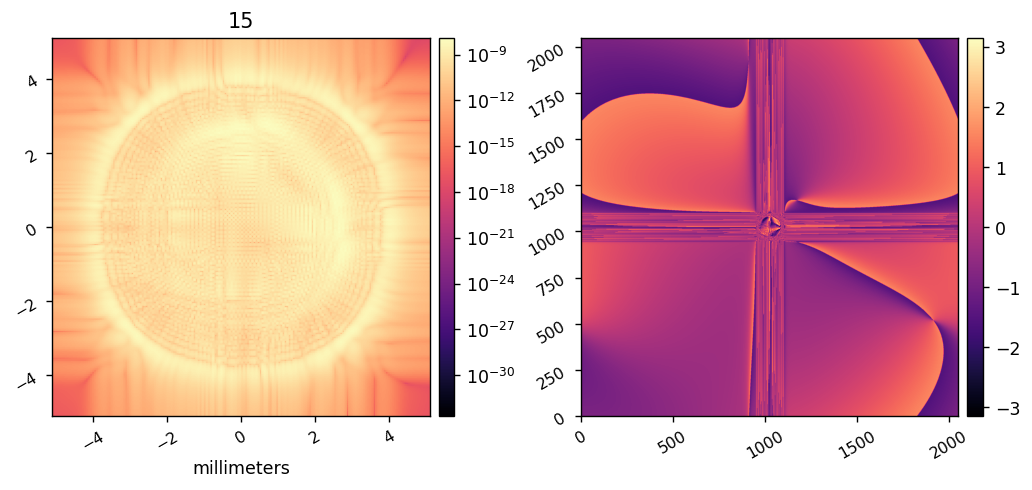

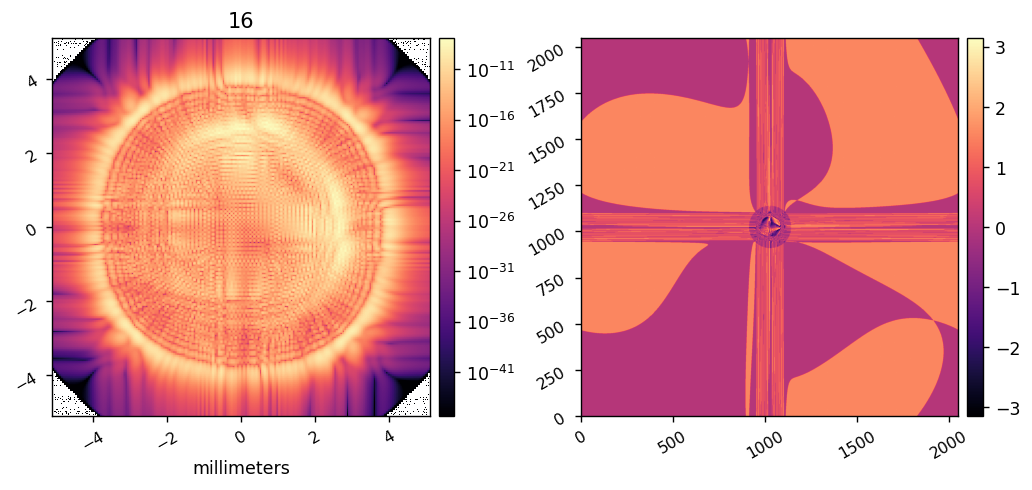

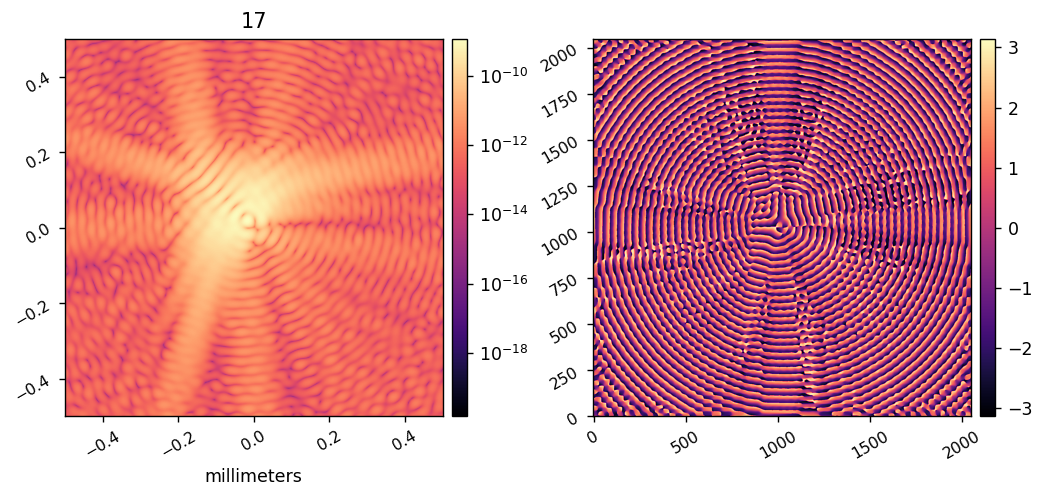

In [7]:
from IPython.display import display

pupil_lim = c.pupil_diam.value/2
fp_lim = 1/2

for i,wf in enumerate(wfs):
    fig, ax = misc.myimshow2(wf.intensity, wf.phase, '{:d}'.format(i), 
                               pxscl1=wf.pixelscale.to(u.mm/u.pix), lognorm1=True,
                               display_fig=False, return_fig=True)
    if i in [c.inter_fp_index, c.fpm_index]:
        ax[0].set_xlim([-fp_lim, fp_lim])
        ax[0].set_ylim([-fp_lim, fp_lim])
    else:
        ax[0].set_xlim([-pupil_lim, pupil_lim])
        ax[0].set_ylim([-pupil_lim, pupil_lim])
    display(fig)